In [3]:
from matplotlib.pylab import *

In [4]:
style.use(['dark_background', 'bmh'])
rc('axes', facecolor='none')
rc('figure', figsize=(16, 4))

In [3]:
x = r_[0:1.5:0.01]
y = maximum(0, 1 - sqrt(x))
y2 = maximum(0, 1 - x)

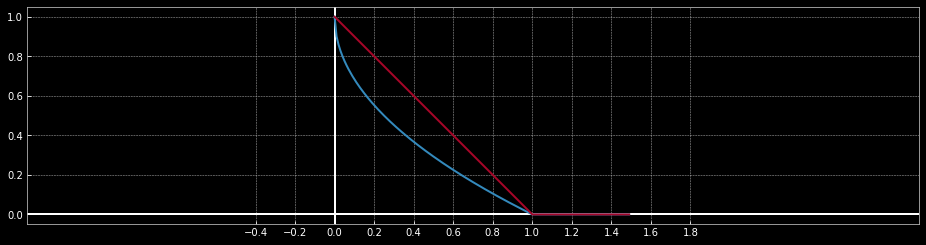

In [4]:
axhline()
axvline()

plot(x, y)
plot(x, y2)
axis('equal')
xticks(arange(-0.4, 2, 0.2));

In [5]:
x = linspace(-2, 2, 1001)
lane_width = 3.7  # m
car_width = 1.8  # m
alpha = 0.5  # m

y = piecewise(x, [
    x < (-car_width / 2 - alpha),
    (-car_width / 2 - alpha <= x) * (x < -car_width / 2),
    (-car_width / 2 <= x) * (x < car_width / 2),
    (car_width / 2 <= x) * (x < car_width / 2 + alpha),
    car_width / 2 + alpha <= x
], [
    0,
    lambda z: (z + car_width / 2 + alpha) / alpha,
    1,
    lambda z: 1 - (z - car_width / 2) / alpha,
    0
])

Text(0,0.5,'y-axis lane loss [ / ]')

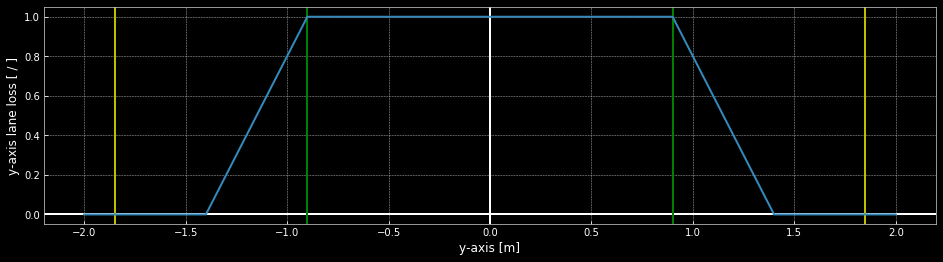

In [6]:
axvline()
axhline()
axvline(-lane_width / 2, color='y')
axvline(lane_width / 2, color='y')
axvline(-car_width / 2, color='g')
axvline(car_width / 2, color='g')

plot(x, y)

xlabel('y-axis [m]')
ylabel('y-axis lane loss [ / ]')

<StemContainer object of 3 artists>

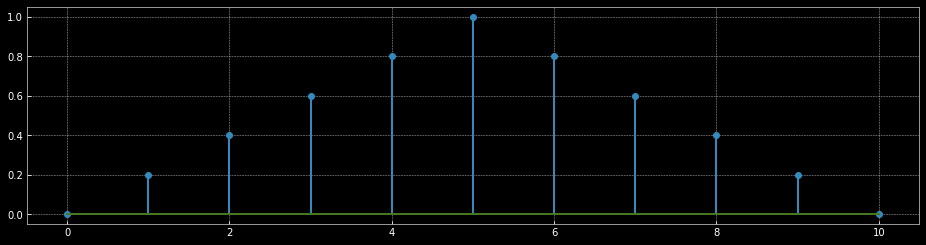

In [7]:
loss = 1 - abs(linspace(-1, 1, 11))
stem(loss)

In [12]:
print(broadcast_to(loss.reshape(-1, 1), (11, 5)))

[[0.  0.  0.  0.  0. ]
 [0.2 0.2 0.2 0.2 0.2]
 [0.4 0.4 0.4 0.4 0.4]
 [0.6 0.6 0.6 0.6 0.6]
 [0.8 0.8 0.8 0.8 0.8]
 [1.  1.  1.  1.  1. ]
 [0.8 0.8 0.8 0.8 0.8]
 [0.6 0.6 0.6 0.6 0.6]
 [0.4 0.4 0.4 0.4 0.4]
 [0.2 0.2 0.2 0.2 0.2]
 [0.  0.  0.  0.  0. ]]


In [13]:
a = arange(1, 12 + 1).reshape(3, 4)
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [14]:
print(rot90(a))

[[ 4  8 12]
 [ 3  7 11]
 [ 2  6 10]
 [ 1  5  9]]


<StemContainer object of 3 artists>

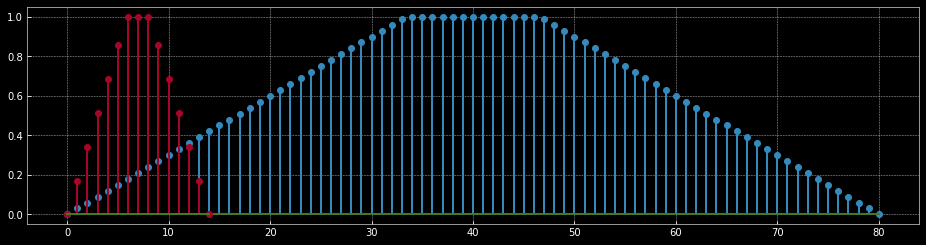

In [32]:
x = 1.2 - abs(linspace(-1.2, 1.2, 81)); x[x > 1] = 1
y = 1.2 - abs(linspace(-1.2, 1.2, 15)); y[y > 1] = 1

stem(x)
stem(y, 'C1', markerfmt='oC1')

(-0.5, 80.5, 14.5, -0.5)

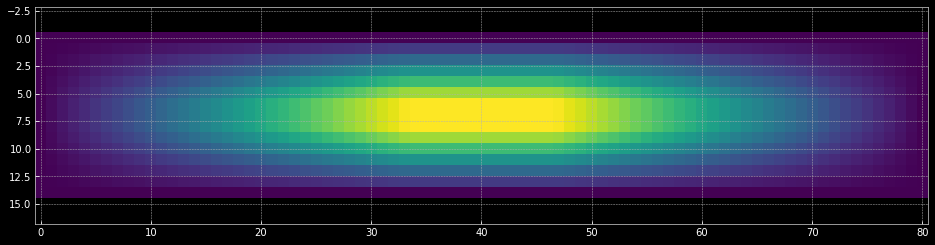

In [35]:
mask = y.reshape(-1, 1) @ x.reshape(1, -1)

imshow(mask)
axis('equal')

In [2]:
import torch

In [37]:
cost = torch.load('/Users/atcold/Traffic/cost.pth')

Text(0.5,0,'Time steps [0.1s]')

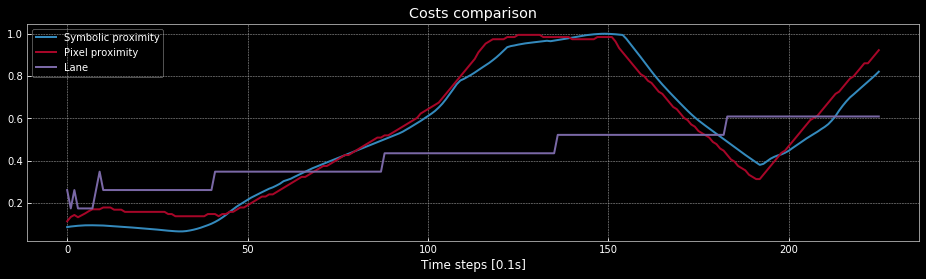

In [42]:
plot(cost[0].numpy())
plot(cost[3].numpy())
plot(cost[1].numpy())
legend(('Symbolic proximity', 'Pixel proximity', 'Lane'))
title('Costs comparison')
xlabel('Time steps [0.1s]')

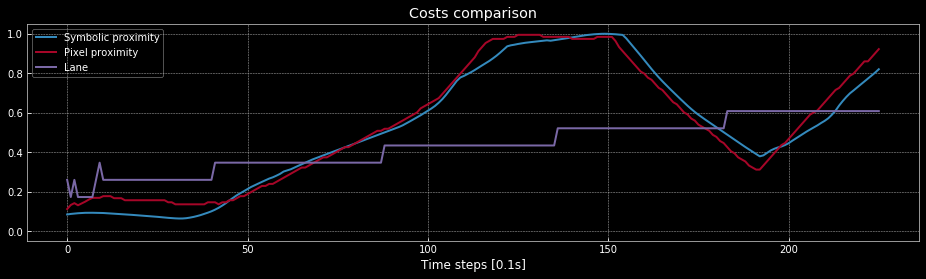

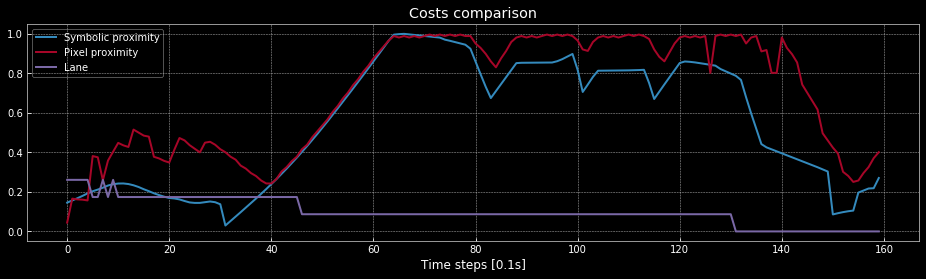

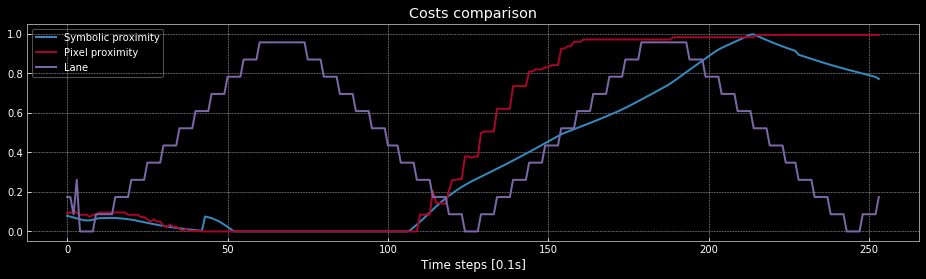

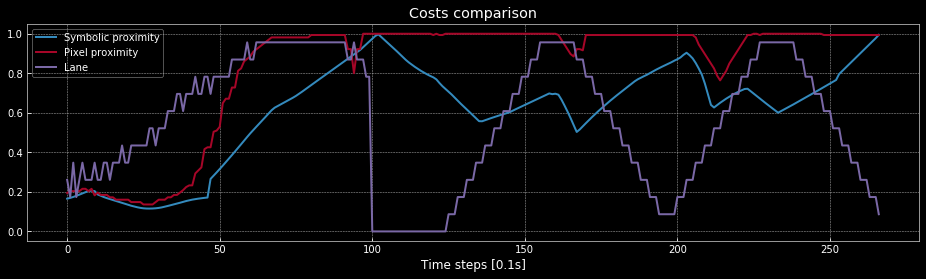

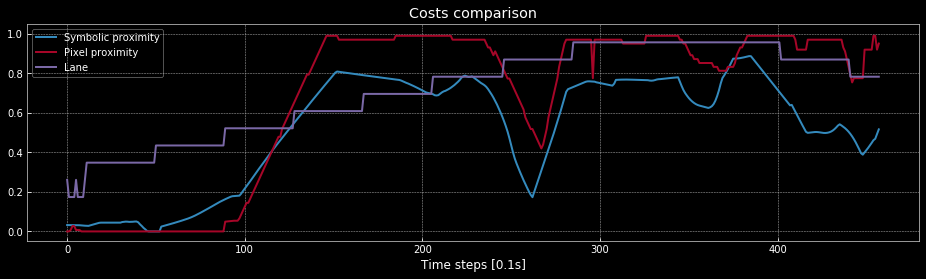

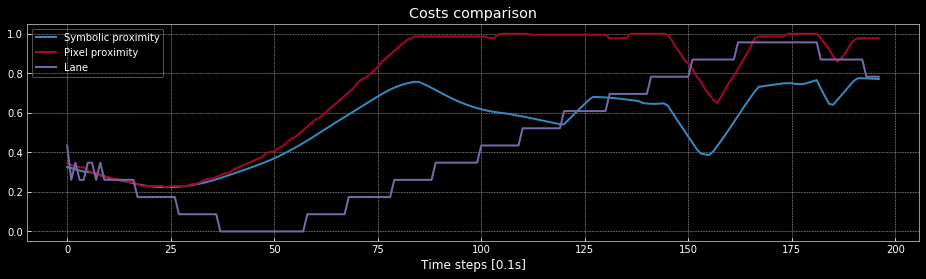

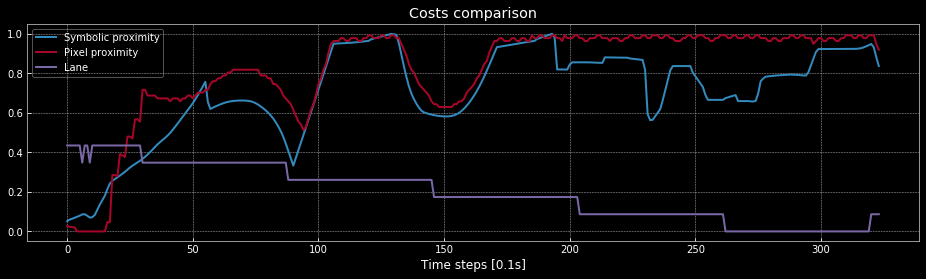

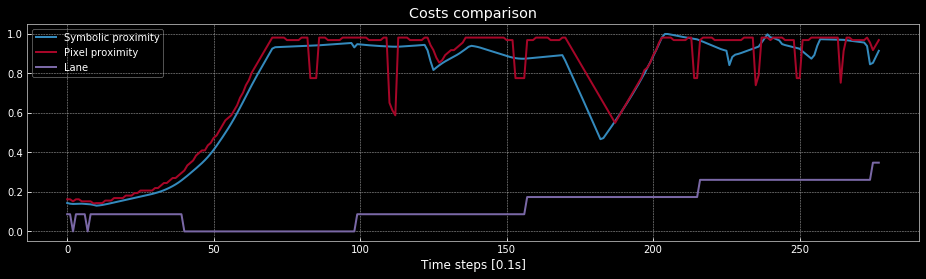

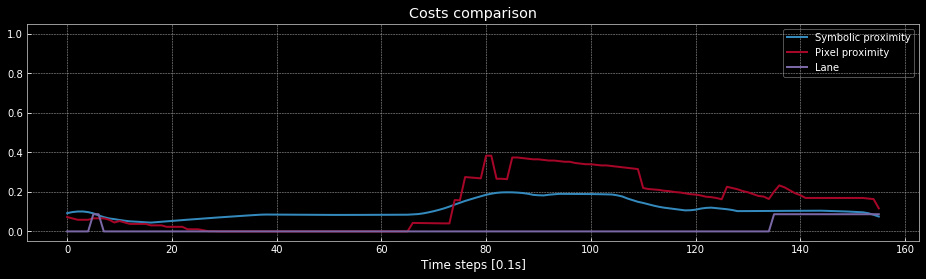

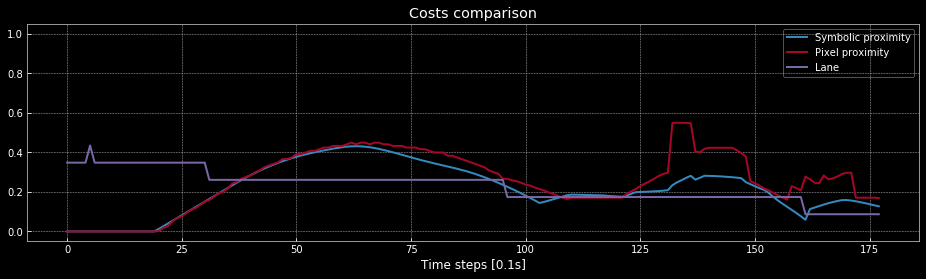

In [48]:
for epoch in range(10):
    cost = torch.load(f'/Users/atcold/Traffic/cost{epoch}.pth')
    figure()
    plot(cost[0].numpy())
    plot(cost[3].numpy())
    plot(cost[1].numpy())
    legend(('Symbolic proximity', 'Pixel proximity', 'Lane'))
    title('Costs comparison')
    xlabel('Time steps [0.1s]')
    ylim((-0.05, 1.05))